<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/800x800-04.jpg" height="200" width="300"> 

# <center> R для тервера и матстата. <br>  <br> 1.1 Подозрительные аномалии при голосовании. </center>

---------

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

__Внимание!__ Этот скрипт __не несёт__ в себе цели оскорбить чувства электората и __не направлен__ на разжигание ненависти к представителям российской власти. В данной тетрадке содержится анализ российской электоральной статистики, в которой наблюдается ряд аномалий. Голосование в России обычно проходит нестандартно. Распределение явки в ней отличается от аналогичных распределений в других странах. Причина таких различий может быть любой. 

Возможно, что на волеизъявление людей что-то повлияло. Большое количество участков с явкой $100\%$ может означать как наличие вбросов, так и сверхпатриотично настроенное население района. Автор тетрадки ни в коей мере не настаивает на том, что аномалии вызваны именно фальсификацией результатов. Кроме того, он отмечает, что возникающие на выборах аномалии требуют дополнительного изучения и призывает заниматься наукой.

Как вы помните, любой скрипт в R начинается с подгрузки пакетов. Нам не понадобится ничего сверхестественного. Мы подгрузим пакет `dplyr` для работы с таблицами и пакет `ggplot2` для строительства симпатявых графиков. Напоминаю, что если у вас нет ккакого-то пакета на компьютере, поставить его можно, прописав `install.packages('имя пакета')`.

In [2]:
library('dplyr')   # Пакет для работы с таблицами 
library('ggplot2') # Пакет для симпатявых графиков

# пакеты, которые нужны для красивого отображения картинок внутри юпитерской тетрадки
# если вы воспроизводите весь код в R-studio, то они вам не нужны. 
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

## 1. Готовим данные к исследованию

В этой тетрадке мы будем заниматься исследование электоральной статистики. Все данные мы скачали с сайта центральной избирательной комиссии. Давайте немного посмотрим на них.

In [3]:
# Подгружаем таблицу 
df = read.csv('data/president_elect_2012.csv', sep='\t', dec=',')

# Параметр sep отвечает за разделители между столбцами
# Параметр dec отвечает за разделитель между целой и десятичной частями числа

Посмотрим на размерность таблицы. У нас есть $94479$ строк и $32$ столбца. 

In [4]:
dim(df)

[1] 94479    32

Посмотрим на верхние 5 записей и чуть более внимательно изучим колонки. У нас есть среди стобцов регион, где проходило голосование, район, число зарегистрированных избирателей, число пришедгих и всякая более детальная информация по каждому участку вплоть до количества голосов, которое было отдано за каждого из кандидатов. 

In [5]:
head(df,5)

X,Unnamed..0,Регион,Район,Число.избирателей..включенных.в.список.избирателей,Число.избирательных.бюллетеней..полученных.участковой.избирательной.комиссией,Число.избирательных.бюллетеней..выданных.избирателям..проголосовавшим.досрочно,Число.избирательных.бюллетеней..выданных.в.помещении.для.голосования.в.день.голосования,Число.избирательных.бюллетеней..выданных.вне.помещения.для.голосования.в.день.голосования,Число.погашенных.избирательных.бюллетеней,⋯,Жириновский.Владимир.Вольфович..абсолютно.,Жириновский.Владимир.Вольфович..доля.,Зюганов.Геннадий.Андреевич..абсолютно.,Зюганов.Геннадий.Андреевич..доля.,Миронов.Сергей.Михайлович..абсолютно.,Миронов.Сергей.Михайлович..доля.,Прохоров.Михаил.Дмитриевич..абсолютно.,Прохоров.Михаил.Дмитриевич..доля.,Путин.Владимир.Владимирович..абсолютно.,Путин.Владимир.Владимирович..доля.
0,УИК №1039,Московская область,Котельниковская городская,405,330,0,263,7,60,⋯,19,7.04,58,21.48,10,3.70,54,20.00,126,46.67
1,УИК №1040,Московская область,Котельниковская городская,2684,2275,0,1666,26,583,⋯,149,8.81,295,17.45,70,4.14,250,14.78,905,53.52
2,УИК №1041,Московская область,Котельниковская городская,2375,2105,0,1408,48,649,⋯,70,4.81,248,17.03,60,4.12,188,12.91,862,59.20
3,УИК №1042,Московская область,Котельниковская городская,2049,1815,0,1156,104,555,⋯,124,9.84,211,16.75,47,3.73,108,8.57,755,59.92
4,УИК №1043,Московская область,Котельниковская городская,2102,1890,0,1334,47,509,⋯,102,7.39,209,15.13,56,4.06,146,10.57,845,61.19


В таблице есть один забавный избирательный участок.

In [6]:
df[df$'Число.избирателей..включенных.в.список.избирателей' == 0,]

,X,Unnamed..0,Регион,Район,Число.избирателей..включенных.в.список.избирателей,Число.избирательных.бюллетеней..полученных.участковой.избирательной.комиссией,Число.избирательных.бюллетеней..выданных.избирателям..проголосовавшим.досрочно,Число.избирательных.бюллетеней..выданных.в.помещении.для.голосования.в.день.голосования,Число.избирательных.бюллетеней..выданных.вне.помещения.для.голосования.в.день.голосования,Число.погашенных.избирательных.бюллетеней,⋯,Жириновский.Владимир.Вольфович..абсолютно.,Жириновский.Владимир.Вольфович..доля.,Зюганов.Геннадий.Андреевич..абсолютно.,Зюганов.Геннадий.Андреевич..доля.,Миронов.Сергей.Михайлович..абсолютно.,Миронов.Сергей.Михайлович..доля.,Прохоров.Михаил.Дмитриевич..абсолютно.,Прохоров.Михаил.Дмитриевич..доля.,Путин.Владимир.Владимирович..абсолютно.,Путин.Владимир.Владимирович..доля.
44397,44396,УИК №404,Вологодская область,Вологодская городская,0,100,0,0,0,100,⋯,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


На нём было зарегистрировано ноль избирателей, но при этом проголосовало целых $100$. Скорее всего, это ошибка, которая была допущена при заполнении данных. Попробуем выбросить это наблюдение для чистоты эксперимента. 

In [7]:
# Выбрасываем его 
df = df[df$'Число.избирателей..включенных.в.список.избирателей' > 0,]

Расчитаем значение явки. Обычно, для простоты, исследователи электоральной статистики высчитывают значение явки как:

$$
Yavka = \frac{N_1+N_2+N_3}{N},
$$

где $N_1$ — бюллетени, выданные избирателям, которые проголосовали досрочно, $N_2$ — бюллетени, выданные избирателям на избирательном участке, $N_3$ — бюллетени, выданные избирателям вне помещений для голосования, а $N$ — списочный состав избирателей (число избирателей, внесённых в списки для голосования на УИКе). 

Рассчитаем показатель явки и вытащим из нашей большой таблицы только те кусочки, которые окажутся нам нужны. Код ниже выглядит страшно, но это только на первый взгляд. 

In [8]:
dff = data.frame('region' = df$'Регион',
                 'raion' = df$'Район',
              'voter_cnt' = df$'Число.избирателей..включенных.в.список.избирателей',
              'yavka' = 100*
                (df$'Число.избирательных.бюллетеней..выданных.избирателям..проголосовавшим.досрочно' +
                 df$'Число.избирательных.бюллетеней..выданных.в.помещении.для.голосования.в.день.голосования' +
                 df$'Число.избирательных.бюллетеней..выданных.вне.помещения.для.голосования.в.день.голосования')/
                 df$'Число.избирателей..включенных.в.список.избирателей',   
              'Zhirinovsky' = as.numeric(as.character(df$'Жириновский.Владимир.Вольфович..доля.')),
              'Zuganov' = as.numeric(as.character(df$'Зюганов.Геннадий.Андреевич..доля.')),
              'Mironov' = as.numeric(as.character(df$'Миронов.Сергей.Михайлович..доля.')),
              'Prohorov' = as.numeric(as.character(df$'Прохоров.Михаил.Дмитриевич..доля.')),
              'Putin' = as.numeric(as.character(df$'Путин.Владимир.Владимирович..доля.'))
                )

Посмотрим на самые верхние колонки, которые мы отобрали для итоговой таблицы. 

In [10]:
head(dff)

region,raion,voter_cnt,yavka,Zhirinovsky,Zuganov,Mironov,Prohorov,Putin
Московская область,Котельниковская городская,405,66.66667,7.04,21.48,3.70,20.00,46.67
Московская область,Котельниковская городская,2684,63.04024,8.81,17.45,4.14,14.78,53.52
Московская область,Котельниковская городская,2375,61.30526,4.81,17.03,4.12,12.91,59.20
Московская область,Котельниковская городская,2049,61.49341,9.84,16.75,3.73,8.57,59.92
Московская область,Котельниковская городская,2102,65.69933,7.39,15.13,4.06,10.57,61.19
Московская область,Котельниковская городская,2270,53.52423,8.81,15.88,3.13,16.87,53.42


Посмотрим на структуру таблицы. Сделать это можно командой `glimse`, которая позволяет "бросить на неё свой взгляд".

In [11]:
glimpse(dff)

Observations: 94,478
Variables: 9
$ region      <fctr> Московская область, Московская область, Московская обл...
$ raion       <fctr> Котельниковская городская, Котельниковская городская, ...
$ voter_cnt   <int> 405, 2684, 2375, 2049, 2102, 2270, 3040, 2572, 2664, 27...
$ yavka       <dbl> 66.66667, 63.04024, 61.30526, 61.49341, 65.69933, 53.52...
$ Zhirinovsky <dbl> 7.04, 8.81, 4.81, 9.84, 7.39, 8.81, 6.04, 8.76, 4.42, 7...
$ Zuganov     <dbl> 21.48, 17.45, 17.03, 16.75, 15.13, 15.88, 14.61, 19.84,...
$ Mironov     <dbl> 3.70, 4.14, 4.12, 3.73, 4.06, 3.13, 3.18, 5.04, 2.99, 5...
$ Prohorov    <dbl> 20.00, 14.78, 12.91, 8.57, 10.57, 16.87, 21.17, 13.27, ...
$ Putin       <dbl> 46.67, 53.52, 59.20, 59.92, 61.19, 53.42, 53.38, 51.23,...


## 2. Исследуем всероссийскую явку

Предварительная обработка данных была не очень то и длительной. Можем заняться рисёрчем! Посмотрим на среднее значение явки, а также на итоговые результаты голосования.

In [12]:
# Функция round используется для округления
round(mean(dff$yavka),2)   

[1] 69.62

Средняя явка на выборы находится в районе $70\%$.

In [13]:
summary(dff[c('Zuganov','Prohorov','Putin','Zhirinovsky','Mironov')])

    Zuganov          Prohorov          Putin         Zhirinovsky    
 Min.   :  0.00   Min.   : 0.000   Min.   :  0.00   Min.   : 0.000  
 1st Qu.: 11.63   1st Qu.: 2.330   1st Qu.: 56.30   1st Qu.: 4.270  
 Median : 16.86   Median : 4.930   Median : 64.46   Median : 6.400  
 Mean   : 16.55   Mean   : 6.202   Mean   : 66.24   Mean   : 6.442  
 3rd Qu.: 21.55   3rd Qu.: 8.510   3rd Qu.: 74.28   3rd Qu.: 8.350  
 Max.   :100.00   Max.   :66.670   Max.   :100.00   Max.   :83.330  
    Mironov      
 Min.   : 0.000  
 1st Qu.: 1.920  
 Median : 3.420  
 Mean   : 3.506  
 3rd Qu.: 4.830  
 Max.   :77.780  

Команда `summary` помогает посмотреть на основую описательную статистику по колонкам из таблички. Примечательно, что для Путина и Зюганова есть участки, где за них были отданы $100\%$ голосов. Интересно сколько таких участков и где конкретно они находятся. 

Нам помогут сделать это срезы. В этой тетрадке мы попробуем делать срезы базовыми методами R. Пакет `dplyr` предлагает свои специальные удобные модные функции для этого, но о них мы поговорим позже. Сравнение `dff$Putin == 100` сравнит каждый элемент из колонки `Putin` с числом $100$ и выдаст либо `TRUE`, элемент в колонке и правда сотня, либо `FALSE`.

In [19]:
(dff$Putin == 100)[1:50]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE

Теперь мы можем запихать этот вектор из тру и фолсов в срез. В таком случае, у нас останутся только те строки, где произошло тру. Посчитаем число таких строк.

In [20]:
nrow(dff[dff$Putin == 100,])

[1] 335

Интересно было бы узнать распределение численности электората по участкам со $100\%$ за Путина. Посмотрим на неё. 

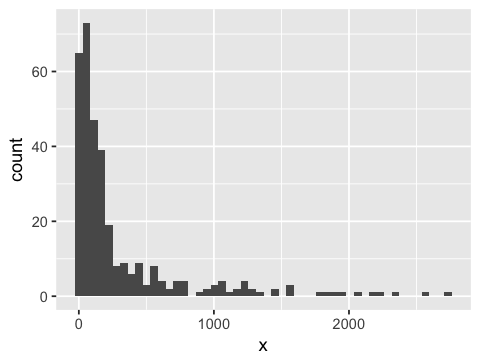

In [21]:
x <- dff[dff$Putin == 100,]$voter_cnt  # вытаскиваем численность в вектор x 
qplot(x, bins=50)                      # строим в волшебном ggplot2 гистограмму

Выглядит адекватно. По большей части, на участках со $100\%$ за Путина, довольно мало голосующих. Среди огромного числа участков вполне вероятно возникновение нескольких участков с единодушным мнением. Посмотрим ту же самую статистику у Зюганова. 

In [22]:
dff[dff$Zuganov == 100,]

,region,raion,voter_cnt,yavka,Zhirinovsky,Zuganov,Mironov,Prohorov,Putin
87673,Республика Карелия,Петрозаводская городская №3 (судовая),11,100,0,100,0,0,0


Всего один участок в России, где коммунизм оказался построен. Посмотрим на распределение явки по России. 

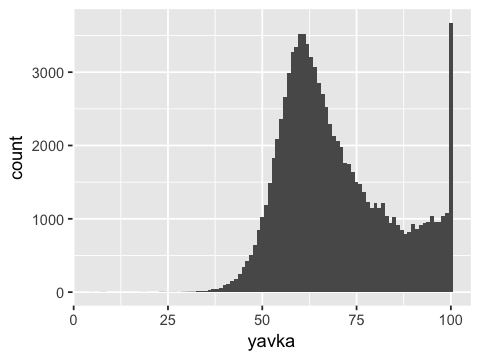

In [23]:
binwidth = 1  # ширина бинов, бин это один столбик
ggplot(dff, aes(x = yavka))+
    geom_histogram(binwidth = binwidth) # Наносим гистограмму                                  

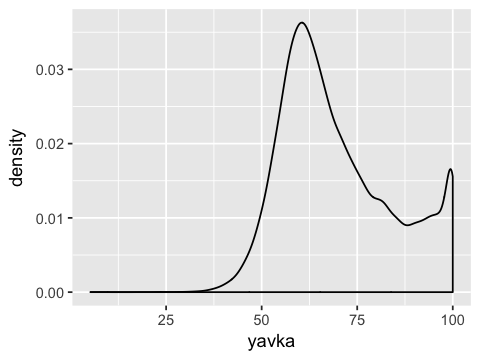

In [24]:
ggplot(dff, aes(x = yavka)) + geom_density()

Распределение избирательных участков по явке выглядит странновато. Ровно тот же результат, что был в слайдах. 

## 3. Исследуем явку по регионам

Чтобы провести исследование явки по регионам, нам нужно будет вытаскивать из большой таблицы подтаблицы, соответствующие регионам. Делать это мы будем с помощью срезов как выше. Например, вот так вот мы можем вытянуть срез с голосванием по Москве. 

In [25]:
dff_small = dff[dff$region  == 'Город Москва',]
head(dff_small)

,region,raion,voter_cnt,yavka,Zhirinovsky,Zuganov,Mironov,Prohorov,Putin
53358,Город Москва,Тверской район,2548,55.61224,5.30,16.82,5.44,25.30,45.16
53359,Город Москва,Тверской район,2430,58.93004,4.63,20.51,5.90,27.60,39.40
53360,Город Москва,Тверской район,2811,59.51619,4.74,20.20,6.06,28.18,38.79
53361,Город Москва,Тверской район,2840,58.23944,4.18,21.29,4.67,33.66,33.90
53362,Город Москва,Тверской район,2073,58.65895,3.81,18.89,5.80,34.80,34.71
53363,Город Москва,Тверской район,3217,61.36152,3.67,23.23,4.18,33.01,33.98


После по этой подтаблице можно строить гистограммы точно также как мы это делали выше. Напишем функцию, которая будет строить такие гистограммы. Если вы не очень хорошо понимаете синтаксис команды `ggplot`, не печальтесь. Обычно каждая такая картинка это куча боли и гугления. 

In [27]:
region_density <- function(dff, region_name, binwidth = 0.5){
    
    # Выделяем маленькую табличку для региона:
    dff_small = dff[dff$region  == region_name,]
    
    # Выводим размеры этой таблички:
    cat('Количество участков в регионе:', nrow(dff_small))

    ggplot(dff_small, aes(x = yavka))+
        geom_histogram(binwidth = binwidth)
    }

Количество участков в регионе: 3386

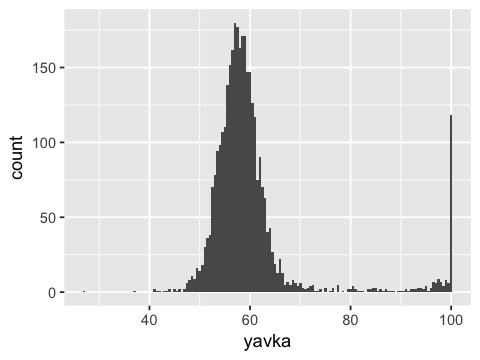

In [28]:
region_density(dff, 'Город Москва')

Количество участков в регионе: 1718

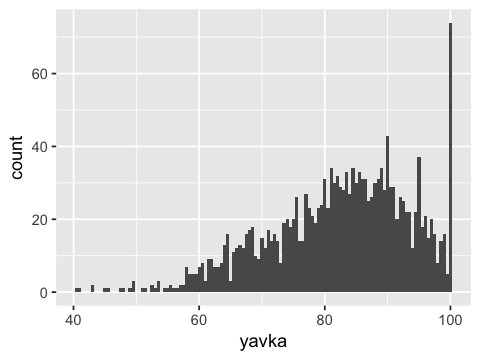

In [29]:
region_density(dff, 'Кемеровская область')

Количество участков в регионе: 1149

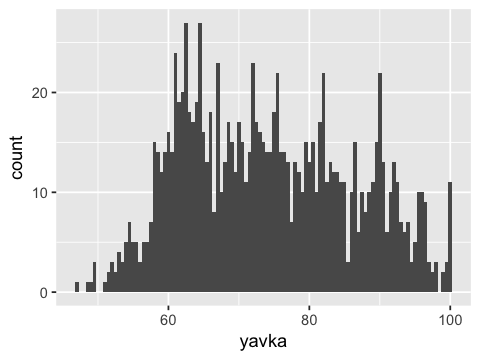

In [30]:
region_density(dff, 'Пензенская область')

Количество участков в регионе: 813

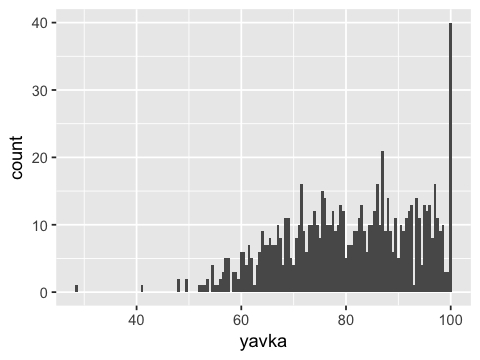

In [31]:
region_density(dff, 'Республика Саха (Якутия)')

Количество участков в регионе: 454

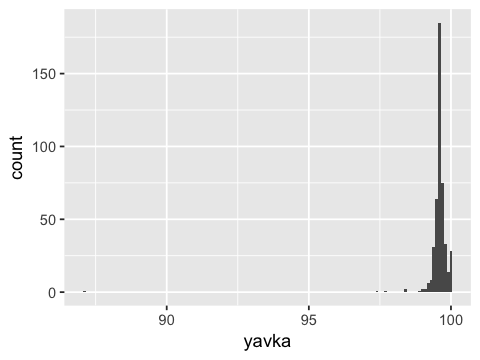

In [32]:
region_density(dff, 'Чеченская Республика', binwidth = 0.1)

Количество участков в регионе: 2853

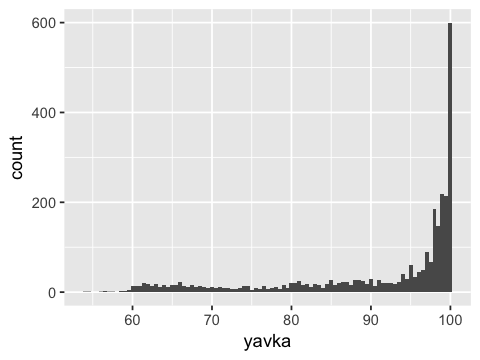

In [33]:
region_density(dff, 'Республика Татарстан (Татарстан)')

## 4. Зависимость доли голосов от явки

Теперь попробуем посмотреть на зависимости доли голосов от явки. Для этого мы будем строить облако рассеивания, где по оси $x$ будет откладываться явка, а по оси $y$ доля голосов за кандидата на участке с такой явкой. 

In [34]:
region_scatter_plot <- function(dff, region_name){
    
    # Выделяем маленькую табличку для региона:
    dff_small = dff[dff$region  == region_name,]
    
    # Выводим размеры этой таблички:
    cat('Количество участков в регионе:', nrow(dff_small))

    options(repr.plot.width=7, repr.plot.height=5)

    ggplot(dff_small, aes(x=yavka, y = value, color = variable)) + 
        geom_point(aes(y = Zuganov, col = "Zuganov"), alpha=0.2) + 
        geom_point(aes(y = Putin, col = "Putin"), alpha=0.2) + 
        geom_point(aes(y = Zhirinovsky, col = "Zhirinovsky"), alpha=0.2) +
        geom_point(aes(y = Mironov, col = "Mironov"), alpha=0.2) +
        geom_point(aes(y = Prohorov, col = "Prohorov"), alpha=0.2)
    }

Количество участков в регионе: 1718

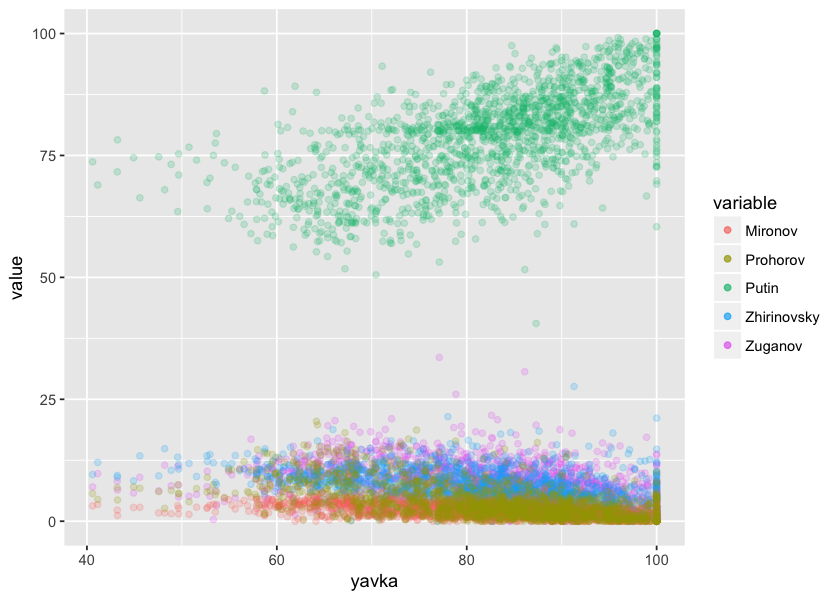

In [35]:
region_scatter_plot(dff, 'Кемеровская область')

Количество участков в регионе: 1149

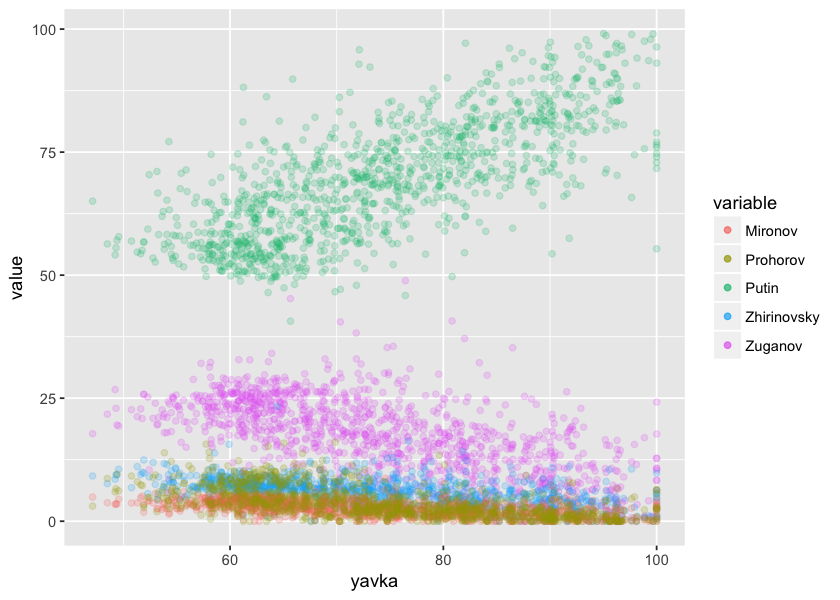

In [36]:
region_scatter_plot(dff, 'Пензенская область')

Количество участков в регионе: 1587

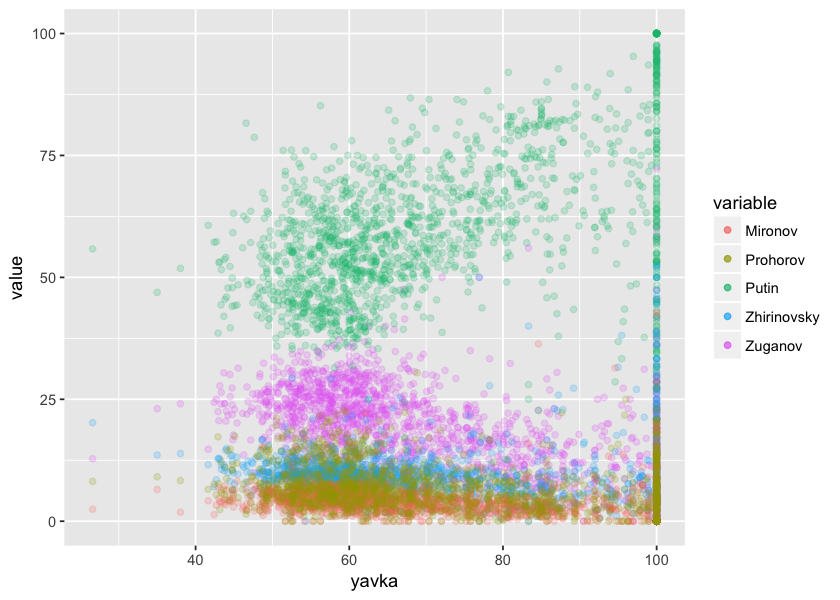

In [37]:
region_scatter_plot(dff, 'Приморский край')

Количество участков в регионе: 833

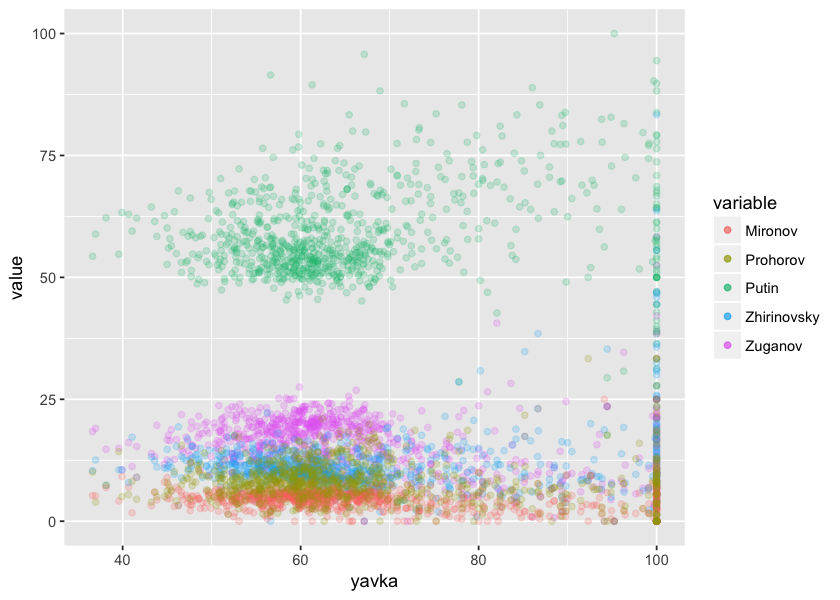

In [38]:
region_scatter_plot(dff, 'Хабаровский край')

Количество участков в регионе: 3386

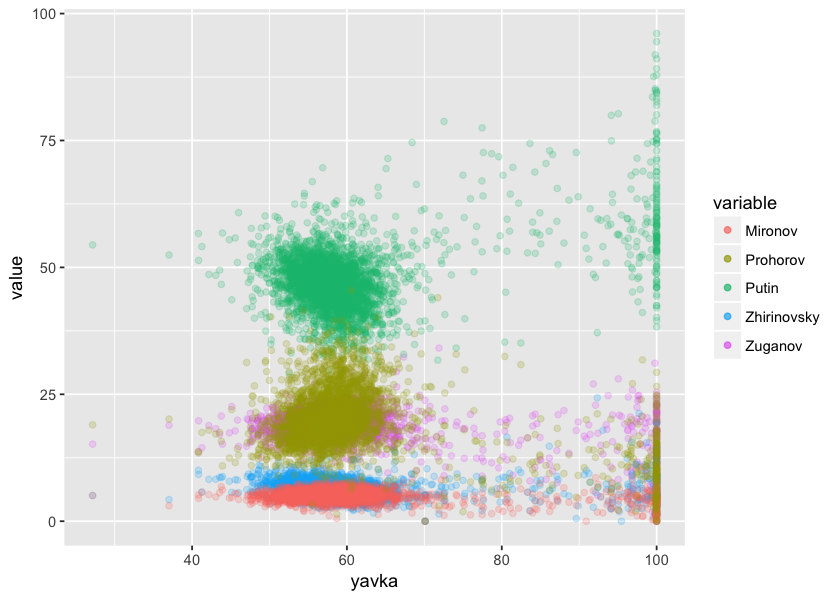

In [39]:
region_scatter_plot(dff, 'Город Москва')

Количество участков в регионе: 2853

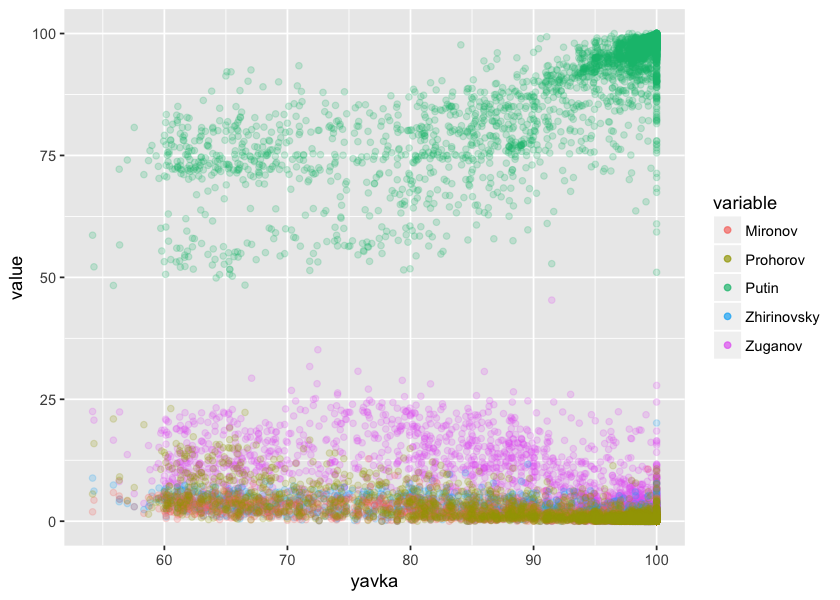

In [40]:
region_scatter_plot(dff, 'Республика Татарстан (Татарстан)')

Посмотрим на точно такую же картинку, агрегированную по субъектам РФ.

In [41]:
# ещё одна не самая простая функция, которая делает агрегирование. 

df_groupby = aggregate(dff[c('Putin','Prohorov','Mironov','Zhirinovsky','Zuganov','yavka')],
                             by=list(dff$region), FUN=mean)
head(df_groupby)

Group.1,Putin,Prohorov,Mironov,Zhirinovsky,Zuganov,yavka
Алтайский край,59.95001,5.621482,3.498056,8.654710,21.33176,62.63764
Амурская область,66.66860,4.476041,2.912848,9.450651,15.34266,65.39791
Архангельская область,61.52702,8.008811,5.855142,9.595183,14.19372,61.01874
Астраханская область,69.21538,4.408447,3.756280,4.950256,16.50522,58.30576
Белгородская область,62.63686,4.455880,3.528704,6.421968,21.89355,79.24564
Брянская область,67.86598,3.219075,2.981673,5.851379,19.23039,70.57623


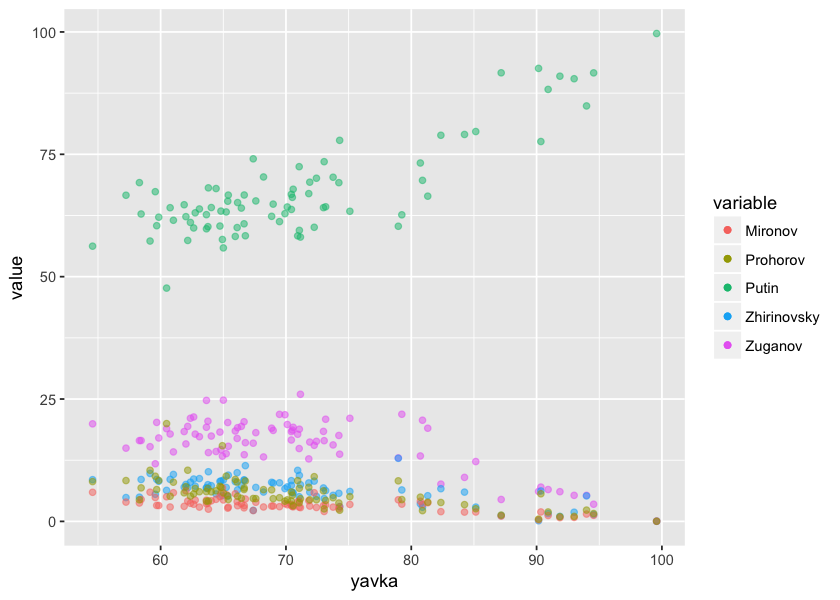

In [42]:
ggplot(df_groupby, aes(x=yavka, y = value, color = variable)) + 
    geom_point(aes(y = Zuganov, col = "Zuganov"), alpha=0.5) + 
    geom_point(aes(y = Putin, col = "Putin"), alpha=0.5) + 
    geom_point(aes(y = Zhirinovsky, col = "Zhirinovsky"), alpha=0.5) +
    geom_point(aes(y = Mironov, col = "Mironov"), alpha=0.5) +
    geom_point(aes(y = Prohorov, col = "Prohorov"), alpha=0.5)

При малых явках имеется более или менее выраженный участок, где результаты разных кандидатов растут пропорционально друг другу.  При дальнейшем росте явки количество голосующих за все кандидатуры, кроме кандидатуры власти, остается постоянным, а все дополнительные голоса, возникающие от прироста явки, отходят к кандидатуре власти. Наконец, при высоких явках доли голосов за все кандидатуры, кроме кандидатуры власти, начинают падать, а все потерянные ими голоса вкупе с дополнительными голосами от роста явки отходят к кандидатуре власти. __Подобному можно дать два объяснения.__

__Вариант первый:__  Население России очень разнородно. Избирательные участки с высокой явкой находятся в местностях или местах, где за кандидатуру власти голосуют охотно, а за остальных кандидатов — мало и редко. Из-за этого возникает зависимость доли голосов, отданной за кандидата, от явки.

__Второй вариант:__ Отъем голосов у «прочих» кандидатов и приписки в пользу кандидатуры власти. Странно, что нет участков единодушно настроенных за коммунистов. Также вызывает сомнение распределение явки, пики в ней на круглых значениях. Ещё больше сомнений вызывают разные декомпозиции явки по учатскам с автоподсчётом голосов и без него, а также декомпозиция по кандидатам. Про всё это можно почитать в почиташках. 

## Почиташки 

* [Карточки Медузы](https://meduza.io/cards/vizhu-mnogo-grafikov-o-falsifikatsii-na-vyborah-chto-oni-znachat) про исследования Шпилькина и последние выборы в думу. 
* [Свежие данные по Франции и Германии](https://meduza.io/feature/2018/03/13/tsentrizbirkom-prizyvaet-ne-otsenivat-vybory-po-gaussu-eto-i-pravda-ne-luchshiy-metod?utm_source=facebook&utm_medium=main) от той же Медузы.

* Одна из [оригинальных статей Шпилькина.](http://trv-science.ru/2009/10/27/statisticheskoe-issledovanie-rezultatov-rossijskix-vyborov-2007-2009-gg/) Рекомендую прочитать её на досуге. Она про выборы 2008 года. 
* Ещё одна [статья Шпилькина.](http://trv-science.ru/2011/12/20/matematika-vyborov-2011/) Она про выборы 2011 года в думу.  К этим же выборам и выборам 2012 года относится [статья о том, как в Москве выборы стали почти честными.](http://trv-science.ru/2012/03/13/chudesa-prodolzhayutsya/) Из-за развития наблюдатеьного движения гистограмма стала куполообразной. Это в очередной раз настораживает. 

* [Ответ ЦИК на исследования, описанные выше.](http://cikrf.ru/activity/relevant/detail/29380/) Ответ очень неплох. Нужно больше подобных споров. 

* [Сайт движения в защиту прав избирателей Голос.](https://www.golosinfo.org/ru/articles/280) Ребята собрали довольно большой пул [cтатистики по выборам](http://els.golosinfo.org/ru/elections?utf8=✓&q%5Beday_day_eq%5D=&q%5Beday_month_eq%5D=&q%5Beday_year_eq%5D=&q%5Bregion_id_eq%5D=&q%5Belevel_id_in_any%5D%5B%5D=1&q%5Bname_ru_cont%5D=) в удобных csv. Можно рисёрчить!

* [Ещё немного про выборы, теорему Байеса и голодовку.](https://politota.d3.ru/paradoks-teoremy-baiesa-kak-zagraditelnyi-barer-na-vyborakh-i-prichina-golodovki-796613/?sorting=rating)